<a href="https://colab.research.google.com/github/thysdoo/Python-Sales-Transactions-Analysis/blob/main/Python_Thuy_Do_Sale_Transactions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/Python - Project 2/'

Mounted at /content/drive


In [ ]:
payment = pd.read_csv(path+"payment_report.csv", encoding = 'utf-8')
payment.head()

,report_month,payment_group,product_id,source_id,volume
0,2023-01,payment,12,45,624110375
1,2023-01,payment,17,45,335715113
2,2023-01,payment,18,45,737784466
3,2023-01,payment,19,45,120963069
4,2023-01,payment,20,45,319653158


In [ ]:
product = pd.read_csv(path+"product.csv", encoding = 'utf-8')
product.head()

,product_id,category,team_own
0,17,PXXXXXB,ASD
1,18,PXXXXXB,ASD
2,20,PXXXXXB,ASD
3,287,PXXXXXB,ASD
4,372,PXXXXXB,ASD


In [ ]:
transactions = pd.read_csv(path+"transactions.csv", encoding = 'utf-8')
transactions.head()

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp
0,3002692434,5,100000,24,1,10199794.0,199794.0,NaN,1682932054455
1,3002692437,305,20000,2,1,14022211.0,14022211.0,NaN,1682932054912
2,3001960110,7255,48605,22,1,NaN,10530940.0,NaN,1682932055000
3,3002680710,2270,1500000,2,1,10059206.0,59206.0,NaN,1682932055622
4,3002680713,2275,90000,2,1,10004711.0,4711.0,NaN,1682932056197


# EDA

## EDA no_duplicates_trans table
- Duplicates: no duplicates
- Missing data:
  + "category" column: 22 null value -> Next step: Replace with "null"
  + "team_own" column: 22 null value -> Next step: Replace with "null"
- Incorrect data types: column "report_month" -> Next step: change datatype to datetime
- Incorrect values: none
- Outliers: "volume" column has 142 outliers -> Next step: No action

payment_group
payment    902
refund      17
Name: count, dtype: int64
(919, 7) (919, 7)
  report_month payment_group  product_id  source_id     volume  category  \
0      2023-01       payment          12         45  624110375   PXXXXXT   
1      2023-01       payment          17         45  335715113   PXXXXXB   
2      2023-01       payment          18         45  737784466   PXXXXXB   
3      2023-01       payment          19         45  120963069  PXXXXXM2   
4      2023-01       payment          20         45  319653158   PXXXXXB   

  team_own  
0      ASD  
1      ASD  
2      ASD  
3      ASD  
4      ASD  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   report_month   919 non-null    object
 1   payment_group  919 non-null    object
 2   product_id     919 non-null    int64 
 3   source_id      919 non-null    int64 
 4   volume    

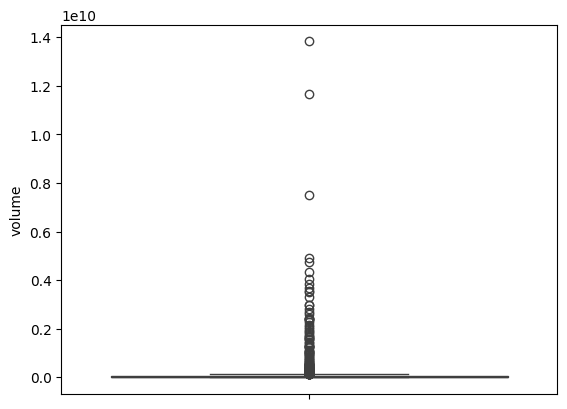

134314970.0 -78588982.0
    report_month  product_id       volume
0     2023-01-01          12    624110375
1     2023-01-01          17    335715113
2     2023-01-01          18    737784466
4     2023-01-01          20    319653158
5     2023-01-01          24   2068335003
..           ...         ...          ...
908   2023-04-01        2391    780514086
915   2023-04-01        1976   3542271587
916   2023-04-01        1976  13831708189
917   2023-04-01        1976   1905435543
918   2023-04-01        1976   3679922071

[142 rows x 3 columns]


In [ ]:
#Merge payment and product table with inner merge
payment_enriched = payment.merge(product, on="product_id", how="left", validate="many_to_many")
print(payment_enriched["payment_group"].value_counts())

#Check duplicate rows
no_duplicates = payment_enriched.drop_duplicates()
print(payment_enriched.shape, no_duplicates.shape)

#Check value, null-data, data types
print(payment_enriched.head())
print(payment_enriched.info())

#Check values
print(payment_enriched.describe())
print(payment_enriched["payment_group"].value_counts())

#Handling missing data
payment_enriched.loc[:,"category"] = payment_enriched.loc[:,"category"].fillna("null")
payment_enriched.loc[:,"team_own"] = payment_enriched.loc[:,"team_own"].fillna("null")
print(payment_enriched.isna().sum())

#Change datatype of "report_month" column
payment_enriched["report_month"] = pd.to_datetime(payment_enriched["report_month"])
print(payment_enriched.dtypes)

#Check outliers
sns.boxplot(data=payment_enriched, y="volume")
plt.show()
seventy_fifth_pay = payment_enriched["volume"].quantile(0.75)
twenty_fifth_pay = payment_enriched["volume"].quantile(0.25)
IQR_volume_pay = seventy_fifth_pay - twenty_fifth_pay
upper = seventy_fifth_pay + (1.5*IQR_volume_pay)
lower = twenty_fifth_pay - (1.5*IQR_volume_pay)
print(upper,lower)
print(payment_enriched[(payment_enriched["volume"]>upper)] \
 [["report_month","product_id","volume"]])

##EDA transaction table
- Duplicates: 28 rows -> Next step: drop duplicates
- Missing data:
  + "sender_id" column: 49058 null value -> Next step: replace with "null"
  + "receiver_id" column: 164792 null value -> Next step: replace with "null"
  + "extra_info" column: 1317879 null value -> Next step: replace with "null"
- Incorrect data types: none
- Incorrect values: none
- Outliers: "volume" column has 177019 outliers -> Next step: No action

(1323974, 9) (1324002, 9)
   transaction_id  merchant_id   volume  transType  transStatus   sender_id  \
0      3002692434            5   100000         24            1  10199794.0   
1      3002692437          305    20000          2            1  14022211.0   
2      3001960110         7255    48605         22            1         NaN   
3      3002680710         2270  1500000          2            1  10059206.0   
4      3002680713         2275    90000          2            1  10004711.0   
5      3002680716         2270   200000          2            1  10162232.0   
6      3002680719           60   200000          2            1  10093450.0   
7      3002680722         6075     1000          2            1  10012978.0   
8      3002680725         2895    83158          2            1  10089635.0   
9      3002680728         2250    23600          8            1  35074809.0   

   receiver_id extra_info      timeStamp  
0     199794.0        NaN  1682932054455  
1   14022211.0    

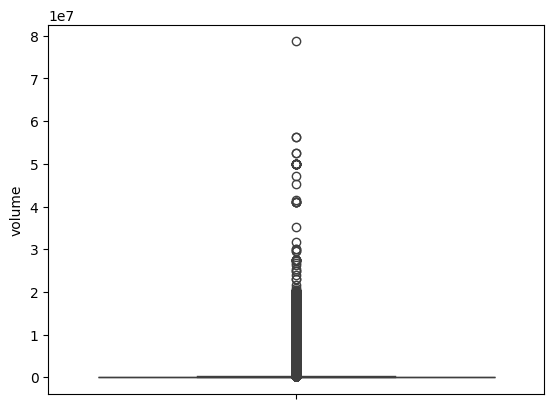

235000.0 -125000.0
         transaction_id  merchant_id   volume sender_id
3            3002680710         2270  1500000      null
11           3001888503         7255  1000000      null
14           3002675010         2270   800000      null
24           3002675034         2270  1000000      null
26           3002652300         2250   255500      null
...                 ...          ...      ...       ...
1323951      3003722967         2270   300000      null
1323962      3003544161         2250  1000000      null
1323971      3003712164         2270   450000      null
1323975      3003602949         2250   500000      null
1323993      3003701355         2260   300000      null

[186889 rows x 4 columns]


In [ ]:
#Check duplicate rows
no_duplicates_trans = transactions.drop_duplicates()
print(no_duplicates_trans.shape, transactions.shape)
transactions = no_duplicates_trans

#Check value, missing-data, data types
print(transactions.head(10))
print(transactions.info())

#Handling missing data
print(transactions.isna().sum())
transactions.loc[:,"sender_id"] = transactions.loc[:,"extra_info"].fillna("null")
transactions.loc[:,"extra_info"] = transactions.loc[:,"extra_info"].fillna("null")
transactions.loc[:,"receiver_id"] = transactions.loc[:,"receiver_id"].fillna("null")
# transactions["receiver_id"] = transactions["receiver_id"].fillna("null")
transactions.isna().sum()

#Check values
print(transactions.describe())
print(transactions["transStatus"].value_counts().head(10))

#Check outliers
sns.boxplot(data=transactions, y="volume")
plt.show()
seventy_fifth_trans = transactions["volume"].quantile(0.75)
twenty_fifth_trans = transactions["volume"].quantile(0.25)
IQR_volume_trans = seventy_fifth_trans - twenty_fifth_trans
upper_trans = seventy_fifth_trans + (1.5*IQR_volume_trans)
lower_trans = twenty_fifth_trans - (1.5*IQR_volume_trans)
print(upper_trans,lower_trans)
print(transactions[(transactions["volume"]>upper_trans)] \
 [["transaction_id","merchant_id","volume","sender_id"]])

# Data Wrangling

1. Top 3 product_ids with the highest volume.

In [ ]:
#Finding top 3 volume group by product_id
top_3_product_ids = payment_enriched.groupby("product_id")["volume"].sum().sort_values(ascending=False).head(3)

#Print result
print("Top 3 product_ids with the highest volume are",top_3_product_ids)

Top 3 product_ids with the highest volume are product_id
1976    61797583647
429     14667676567
372     13713658515
Name: volume, dtype: int64


2. Given that 1 product_id is only owed by 1 team, are there any abnormal products against this rule?

In [ ]:
#Distinct count team_own by product_id
products_by_teams = payment_enriched.groupby("product_id")["team_own"].nunique()

#Define products by multiple teams
products_by_multiple_teams = len(products_by_teams[products_by_teams != 1])

#Print result
if products_by_multiple_teams == 0:
  print("There are no abnormal products against this rule")
else:
  print("Products by multiple teams are",products_by_multiple_teams)

There are no abnormal products against this rule


3. Find the team has had the lowest performance (lowest volume) since Q2.2023. Find the category that contributes the least to that team.

In [ ]:
#Slicing table in Q2.2023
payment_enriched_Q2 = payment_enriched[payment_enriched["report_month"] >= "2023-04-01"]

#Define lowest volume teams in Q2.2023
lowest_volume_team = payment_enriched_Q2.groupby("team_own")["volume"].sum().sort_values()
payment_enriched_Q2_lowest_volume_team = payment_enriched_Q2[payment_enriched_Q2["team_own"] == lowest_volume_team.index[0]]

#Define lowest category in lowest volume teams in Q2.2023
lowest_volume_category = payment_enriched_Q2_lowest_volume_team.groupby("category")["volume"].sum().sort_values()

#Print result
print("The team had the lowest performance is",lowest_volume_team.index[0],"with the category",lowest_volume_category.index[0],"that contributes the least to that team.")

The team had the lowest performance is APS with the category PXXXXXE that contributes the least to that team.


4. Find the contribution of source_ids of refund transactions (payment_group = ‘refund’), what is the source_id with the highest contribution?

In [ ]:
#Slicing table with rows has payment_group is refund
payment_enriched_refund = payment_enriched[payment_enriched["payment_group"] == "refund"]

#Define refund contribution
refund_contribution = payment_enriched_refund.groupby("source_id")["volume"].sum().sort_values(ascending=False)

#Print result
print("The source_id with the highest contribution is",refund_contribution.index[0])

The source_id with the highest contribution is 38


5. Define type of transactions (‘transaction_type’) for each row, given:
- transType = 2 & merchant_id = 1205: Bank Transfer Transaction
- transType = 2 & merchant_id = 2260: Withdraw Money Transaction
- transType = 2 & merchant_id = 2270: Top Up Money Transaction
- transType = 2 & others merchant_id: Payment Transaction
- transType = 8, merchant_id = 2250: Transfer Money Transaction
- transType = 8 & others merchant_id: Split Bill Transaction
- Remained cases are invalid transactions


In [ ]:
#Creat Transaction type column
conditions = [(transactions['transType'] == 2) & (transactions['merchant_id'] == 1205),
             (transactions['transType'] == 2) & (transactions['merchant_id'] == 2260),
             (transactions['transType'] == 2) & (transactions['merchant_id'] == 2270),
             (transactions['transType'] == 2) & (transactions['merchant_id'] != 1205) &
             (transactions['merchant_id'] != 2260) & (transactions['merchant_id'] != 2270),
             (transactions['transType'] == 8) & (transactions['merchant_id'] == 2250),
             (transactions['transType'] == 8) & (transactions['merchant_id'] != 2250)]

trans_type = ['Bank Transfer Transaction',
              'Withdraw Money Transaction',
              'Top Up Money Transaction',
              'Payment Transaction',
              'Transfer Money Transaction',
              'Split Bill Transaction']

transactions['transaction_type'] = np.select(conditions, trans_type, default='Invalid Transaction')

#Print head of table with transaction type
print(transactions.head())

   transaction_id  merchant_id   volume  transType  transStatus   sender_id  \
0      3002692434            5   100000         24            1  10199794.0   
1      3002692437          305    20000          2            1  14022211.0   
3      3002680710         2270  1500000          2            1  10059206.0   
4      3002680713         2275    90000          2            1  10004711.0   
5      3002680716         2270   200000          2            1  10162232.0   

  receiver_id extra_info      timeStamp          transaction_type  
0    199794.0       null  1682932054455       Invalid Transaction  
1  14022211.0       null  1682932054912       Payment Transaction  
3     59206.0       null  1682932055622  Top Up Money Transaction  
4      4711.0       null  1682932056197       Payment Transaction  
5    162232.0       null  1682932056816  Top Up Money Transaction  


6. Of each transaction type (excluding invalid transactions): find the number of transactions, volume, senders and receivers.

In [ ]:
#Slicing table excliding invalid transactions
exclude_invalid = transactions[transactions['transaction_type'] != 'Invalid Transaction']

#Group by transaction_type
transaction_type = exclude_invalid.groupby("transaction_type").agg(transaction_count=("transaction_id","count"),
                                                                   volume_sum=("volume","sum"),
                                                                   senders=("sender_id","nunique"),
                                                                   receivers=("receiver_id","nunique"))
print(transaction_type)

                            transaction_count    volume_sum  senders  \
transaction_type                                                       
Bank Transfer Transaction               37879   50605806190    23156   
Payment Transaction                    398665   71850608441   139583   
Split Bill Transaction                   1376       4901464     1323   
Top Up Money Transaction               290498  108605618829   110409   
Transfer Money Transaction             341173   37032880492    39021   
Withdraw Money Transaction              33725   23418181420    24814   

                            receivers  
transaction_type                       
Bank Transfer Transaction        9272  
Payment Transaction            113299  
Split Bill Transaction            572  
Top Up Money Transaction       110409  
Transfer Money Transaction      34585  
Withdraw Money Transaction      24814  
